In [1]:
%store -r __import

In [2]:
__import

In [3]:
train = pd.read_csv('/home/tuts/datasets/titanic/train.csv')
test = pd.read_csv('/home/tuts/datasets/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


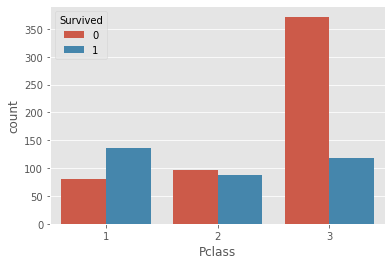

In [46]:
sns.countplot(x=train['Pclass'], hue=train['Survived']);

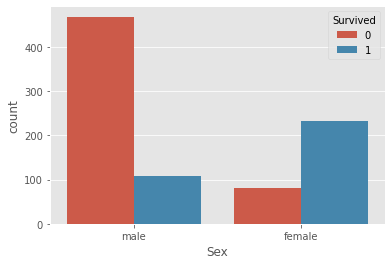

In [47]:
sns.countplot(x=train['Sex'], hue=train['Survived']);

In [52]:
train[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


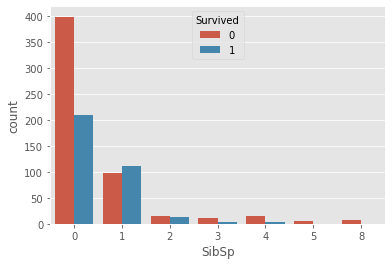

In [48]:
sns.countplot(x=train['SibSp'], hue=train['Survived']);

In [53]:
train[['Survived', 'SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


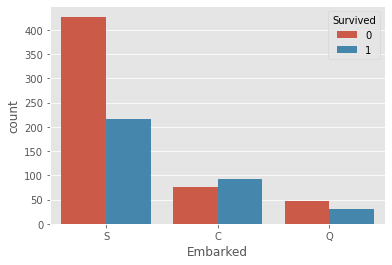

In [49]:
sns.countplot(x=train['Embarked'], hue=train['Survived']);

In [39]:
survivors = train[train.Survived == 1]
dead = train[train.Survived == 0]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [32]:
survivors.Sex.value_counts()/survivors.shape[0]

female    0.681287
male      0.318713
Name: Sex, dtype: float64

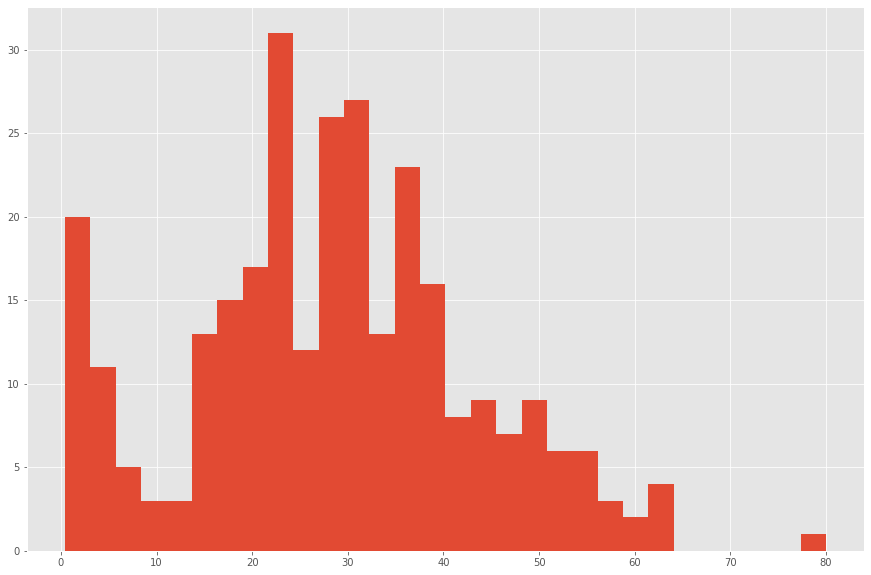

In [7]:
plt.figure(figsize=(15,10))
plt.hist(survivors.Age, bins=30);

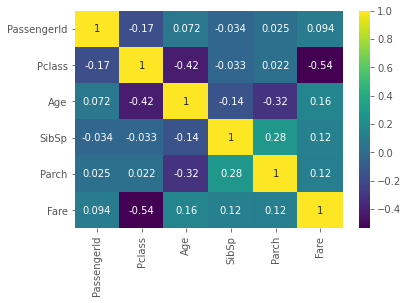

In [10]:
corr = survivors.drop('Survived', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='viridis');

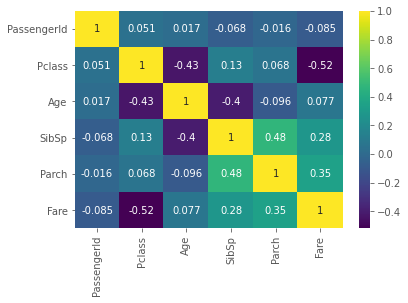

In [43]:
corr = dead.drop('Survived', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='viridis');

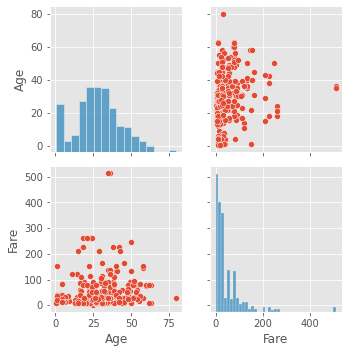

In [16]:
g = sns.PairGrid(survivors[['Age','Fare']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

In [22]:
survivors[survivors.Cabin.notna()].shape[0]/survivors.shape[0]

0.39766081871345027

In [42]:
dead[dead.Cabin.notna()].shape[0]/dead.shape[0]

0.12386156648451731

In [23]:
survivors.Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

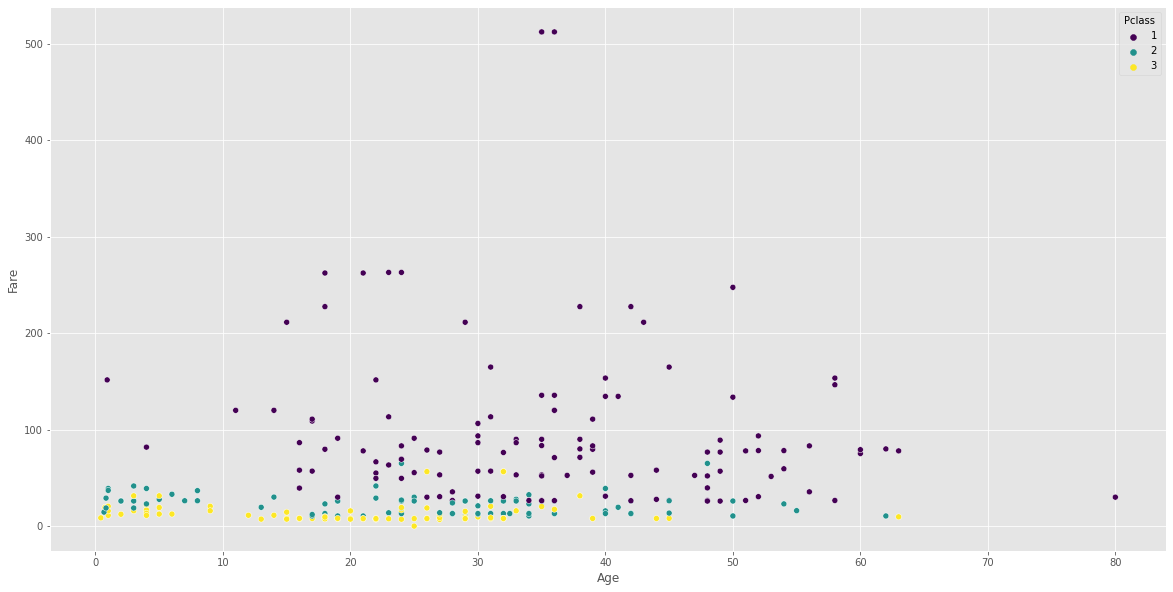

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=survivors.Age, y=survivors.Fare, hue=survivors.Pclass, palette='viridis');

In [33]:
survivors.Embarked.describe()

count     340
unique      3
top         S
freq      217
Name: Embarked, dtype: object

In [34]:
survivors.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [41]:
dead.Embarked.value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

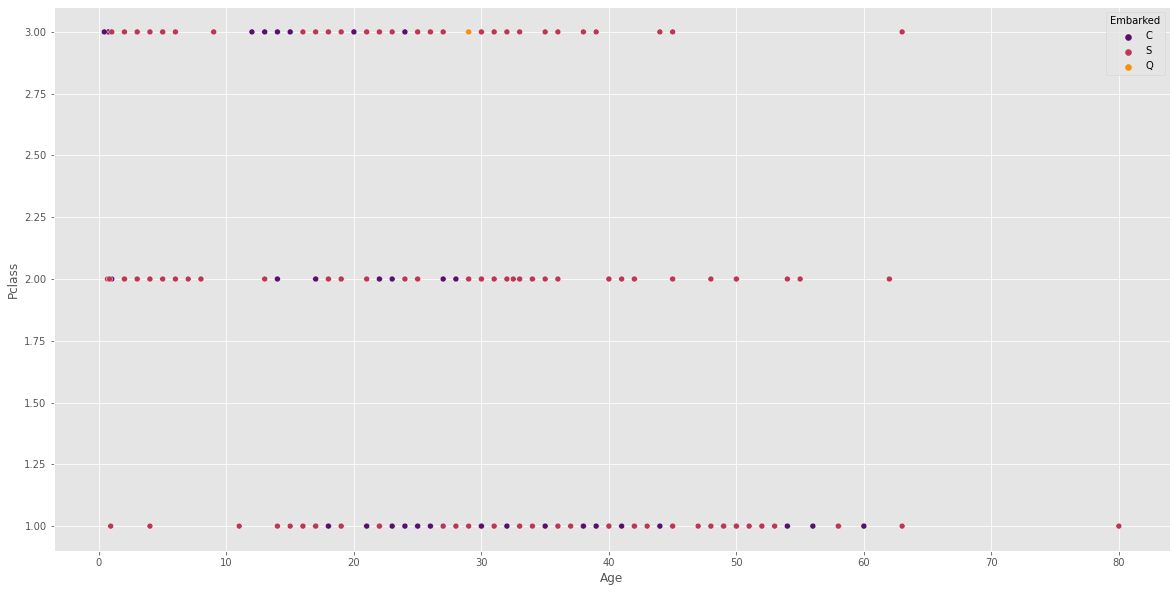

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=survivors.Age, y=survivors.Pclass, hue=survivors.Embarked, palette='inferno');

In [38]:
survivors.SibSp.value_counts()

0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [40]:
dead.SibSp.value_counts()

0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64